###  Attribute Information:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:
   'mon','tue','wed','thu','fri')
 - Duration: last contact duration, in seconds (numeric). Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

    
####  Social and economic context attributes
 - Emp.var.rate: employment variation rate - quarterly indicator
   (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator
   (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')


## Importing Libraries


In [27]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [28]:
# Creating bank dataframe
bank = pd.read_csv('bank-additional-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Basic Information:

In [29]:
bank.shape

(41188, 21)

In [30]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [31]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [32]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

The bank dataset does not contain any null values.

Checking Duplicate values:

In [33]:
print(bank.duplicated().sum())

12


There are 12 duplicate rows in the dataset that need to be deleted.

In [34]:
bank.drop_duplicates(inplace=True)

In [35]:
print(bank.duplicated().sum())

0


Analysising Target Column (y)

In [36]:
bank['y'].value_counts(normalize=True)

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

* The dataset exhibits a significant class imbalance. The "no" class (clients who did not subscribe) dominates the dataset at approximately 88.82%, while the "yes" class (clients who subscribed) represents only 11.18% of the data.

* Building predictive models requires addressing class imbalance through class weighting, oversampling, or undersampling. Use evaluation metrics like F1-score, precision, and recall instead of accuracy for better model assessment.

In [37]:
# Target Varibale:
bank['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41176, dtype: object

* The target variable 'y' contains only two distinct values: "yes" and "no", making this a binary classification task. The goal is to predict whether a client will subscribe (yes) or not subscribe (no) to a term deposit.
* Therefore, the label encoding technique will be used for the target feature.

In [38]:
y = pd.get_dummies(bank['y'],columns=['y'],prefix=['y'],drop_first=True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [39]:
y

,['y']_yes
0,False
1,False
2,False
3,False
4,False
...,...
41183,True
41184,False
41185,False
41186,True


* We will organize the bank marketing dataset into separate dataframes based on different attribute categories: bank client information, last contact details from the current campaign, social and economic indicators, and other relevant attributes.

* Each dataframe will undergo exploratory data analysis to understand the data patterns and characteristics.

* After analyzing each category, we will merge all the dataframes into a single comprehensive dataset. Finally, we will use this combined dataset to train our predictive model.

In [40]:
# Bank Client Data
bank_client = bank.iloc[:, 0:7]

# Related with the last contact of the current campign
bank_related = bank.iloc[:,7:11]

# Social and Economic Context attributes
bank_se = bank.loc[:,['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] ]

# Other attributes
bank_other = bank.loc[:, ['campaign', 'pdays','previous', 'poutcome']]

## 1. Bank client data analysis

In [41]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


#### 1.1 AGE


In [42]:
print('Max Age:',bank_client['age'].max())
print('Min Age:',bank_client['age'].min())

Max Age: 98
Min Age: 17


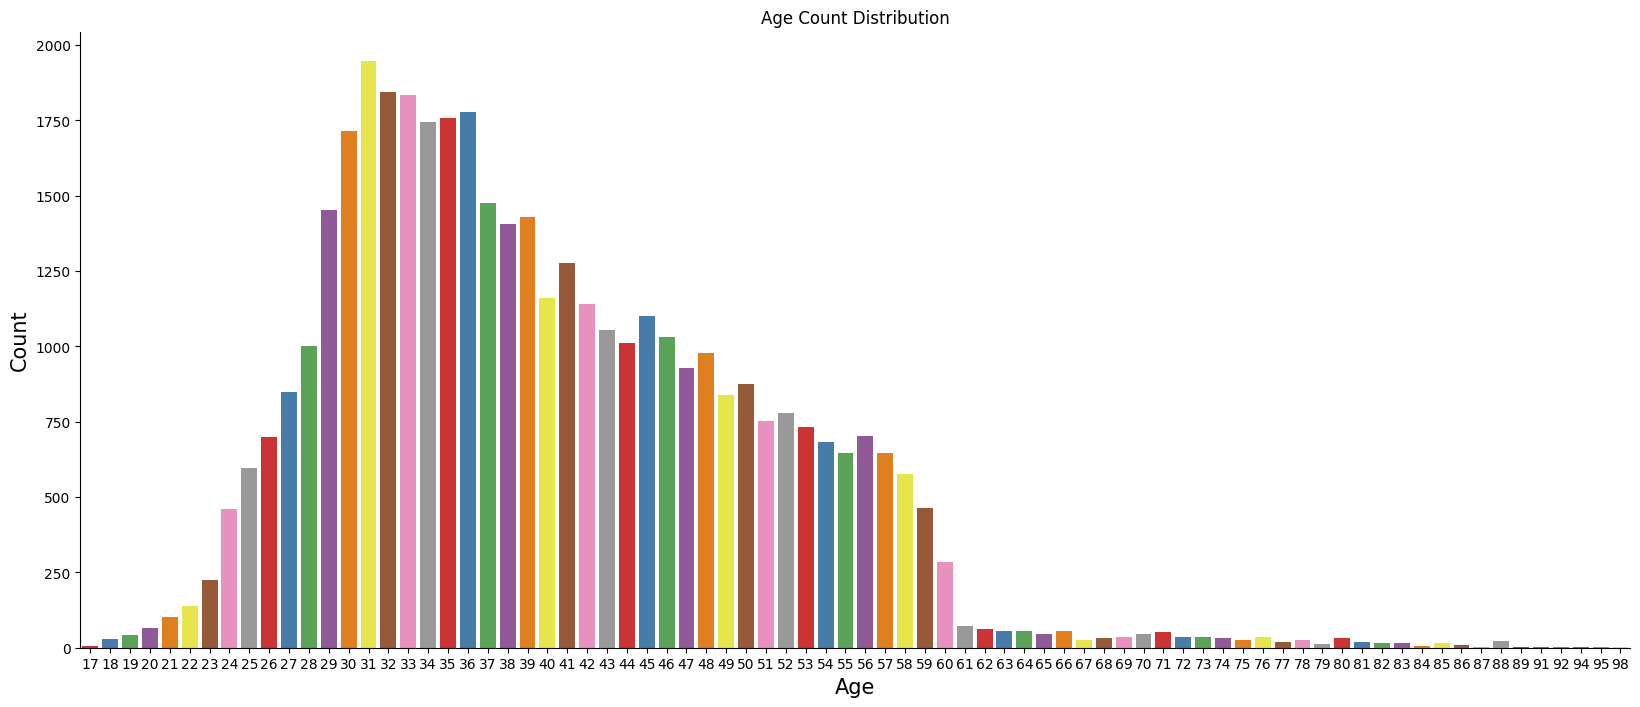

In [43]:
# Checking the distribution of age in dataset
fig,ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x='age', data=bank_client, palette='Set1')

ax.set_xlabel('Age',fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.set_title('Age Count Distribution')

sns.despine()

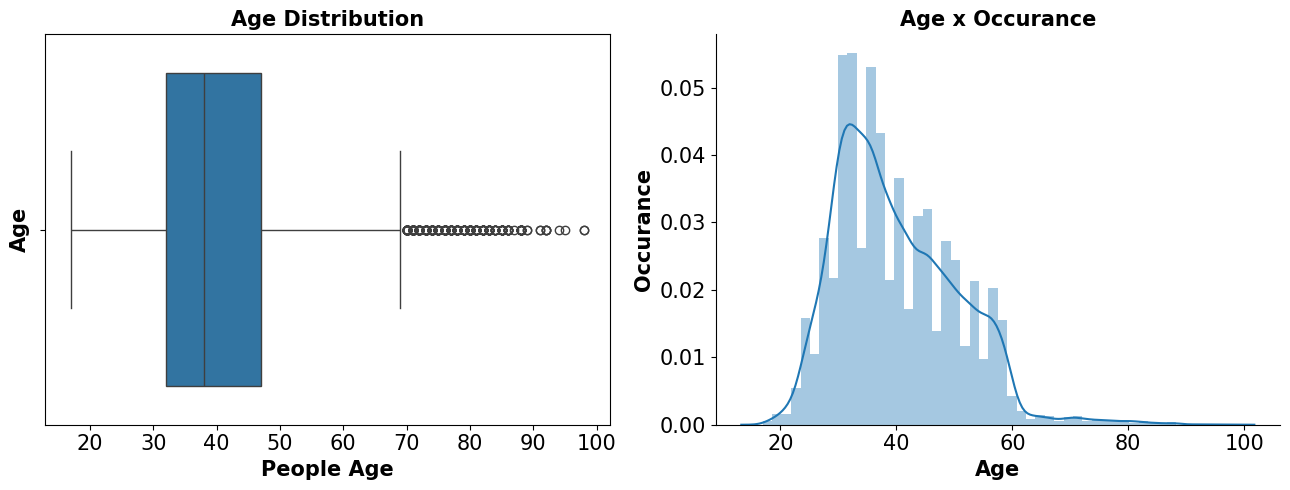

In [44]:
# Checking outliers:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
sns.boxplot(x='age',data=bank_client,orient='v',ax=ax1)
ax1.set_xlabel('People Age',fontsize=15,fontweight='bold')
ax1.set_ylabel('Age',fontsize=15,fontweight='bold')
ax1.set_title('Age Distribution',fontsize=15,fontweight='bold')
ax1.tick_params(labelsize=15)

# Distribution plot:
sns.distplot(bank_client['age'],ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('Age',fontsize=15,fontweight='bold')
ax2.set_ylabel('Occurance',fontsize=15,fontweight='bold')
ax2.set_title('Age x Occurance',fontsize=15,fontweight='bold')
ax2.tick_params(labelsize=15)

plt.tight_layout()

* The boxplot reveals age outliers beyond the typical range, while the distribution plot shows age is approximately normally distributed with most clients between 30-60 years. The dataset contains some elderly clients (70+) as outliers. The majority of bank clients are middle-aged, indicating targeted marketing toward this demographic group.

* The distribution plot demonstrates that client ages follow a roughly normal distribution centered around 40 years. Most clients are concentrated in the 30-60 age range, indicating the bank primarily targets middle-aged customers. The symmetric distribution suggests balanced age representation across this primary demographic, with fewer clients at extreme age boundaries.

#### 1.2 JOB


In [45]:
bank_client.job.value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

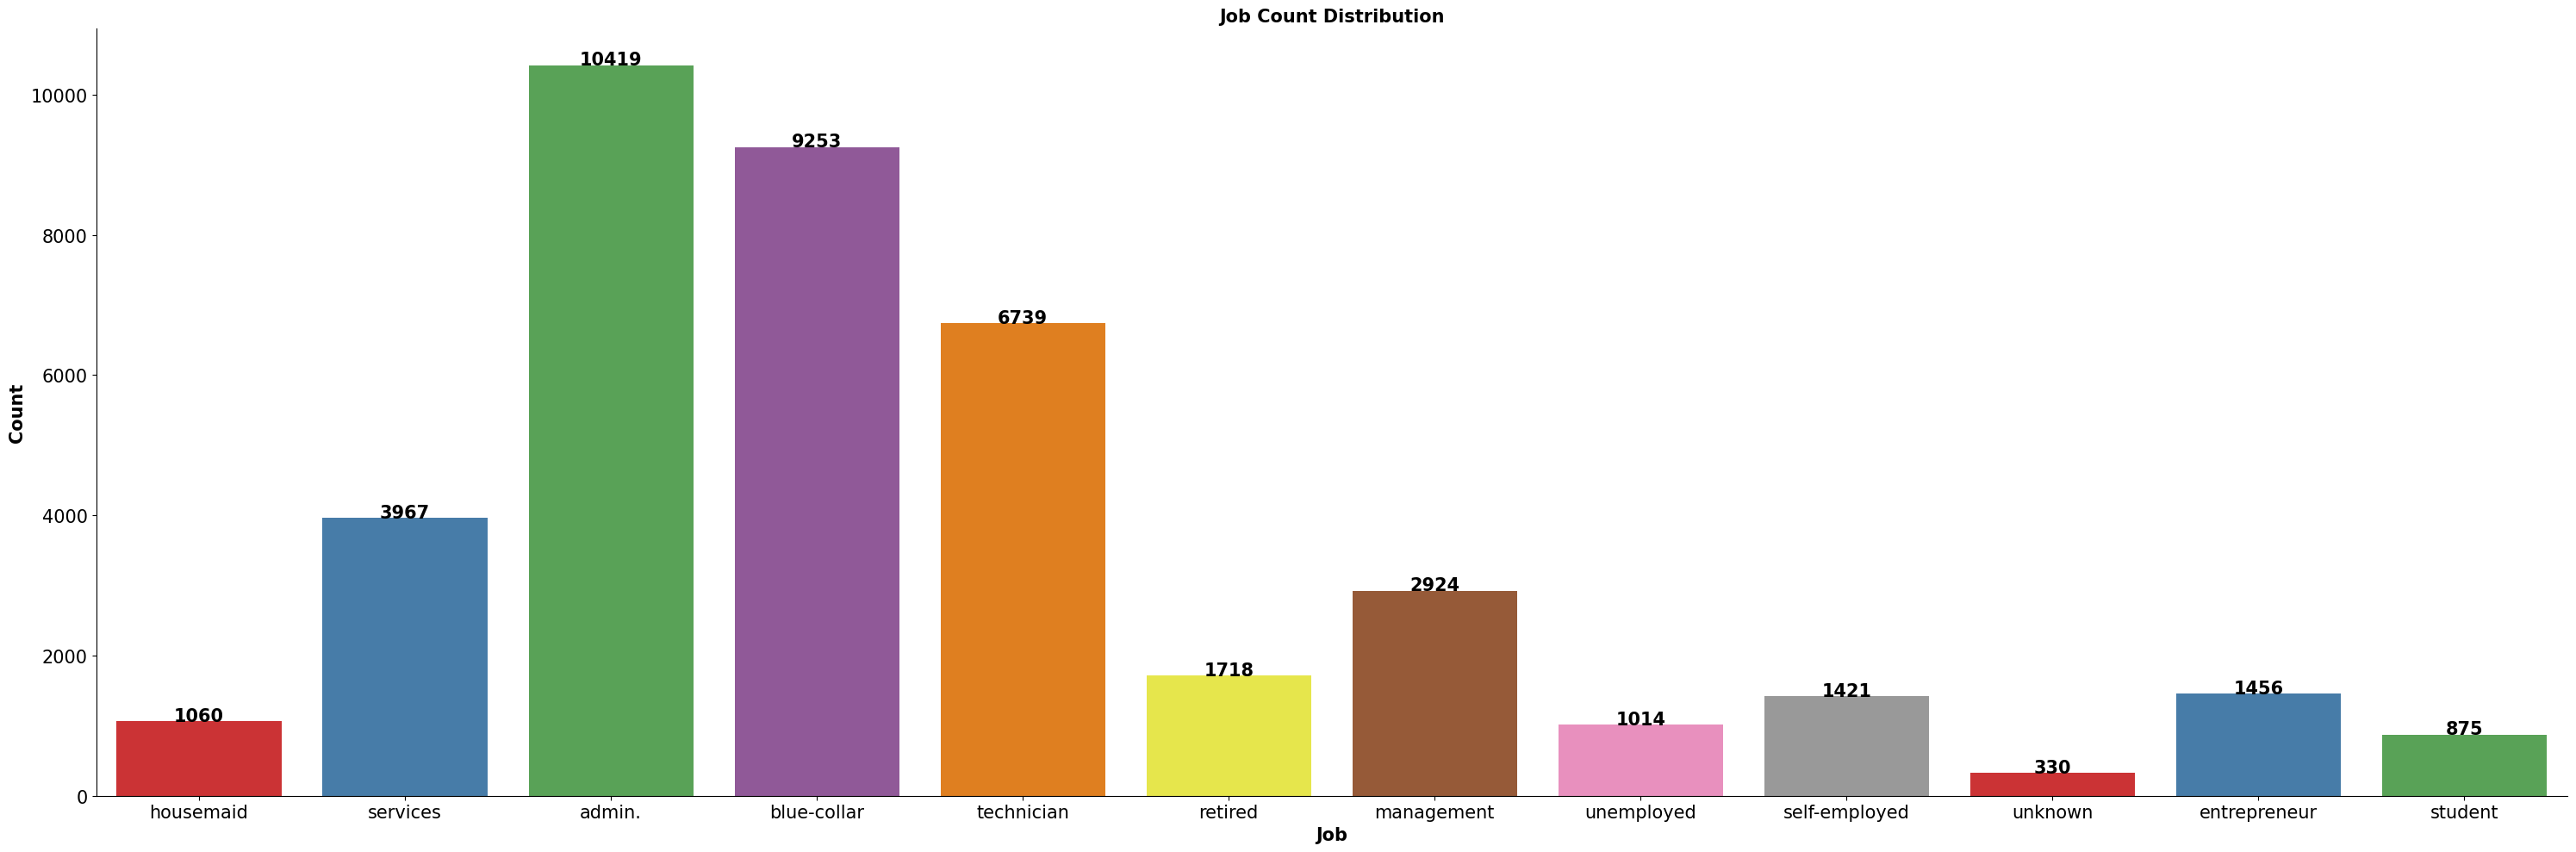

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.countplot(x='job', data=bank_client, ax=ax, palette='Set1')

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            '{:1.0f}'.format(height),
            ha="center", fontsize=15, fontweight='bold')

ax.set_xlabel('Job', fontsize=15, fontweight='bold')
ax.set_ylabel('Count', fontsize=15, fontweight='bold')
ax.set_title('Job Count Distribution', fontsize=15, fontweight='bold')
ax.tick_params(labelsize=15)
sns.despine()
plt.tight_layout()
plt.show()

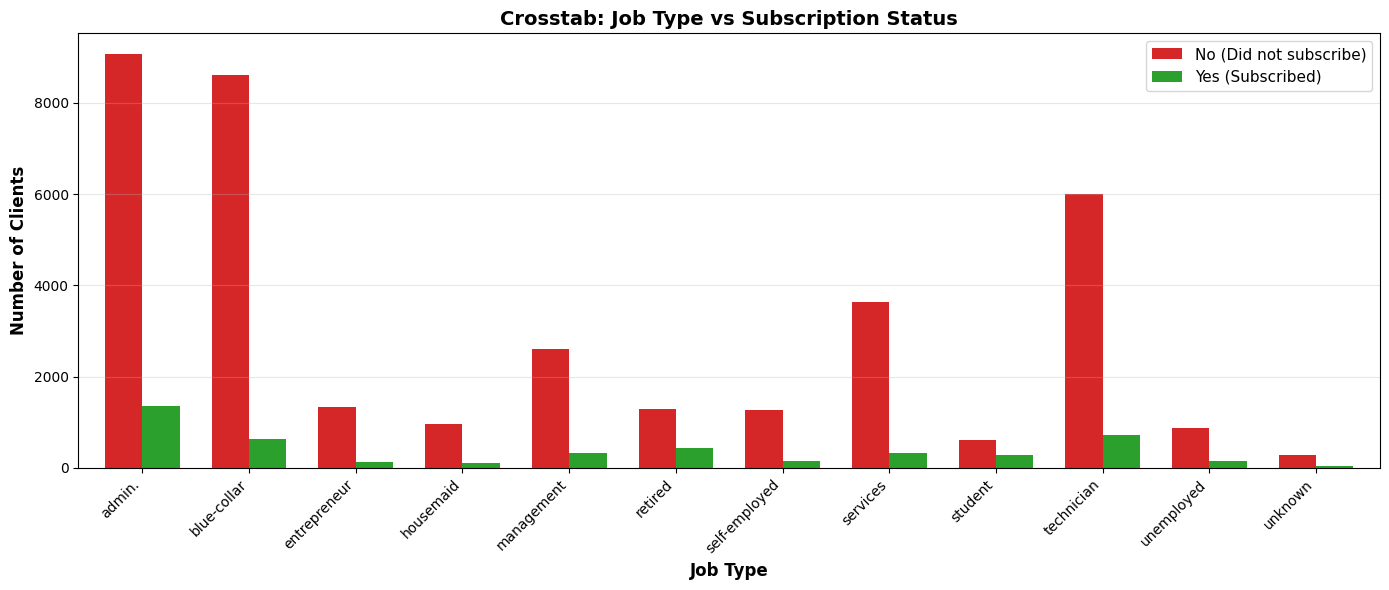

In [47]:
# Create crosstab
crosstab = pd.crosstab(bank['job'], bank['y'])

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
crosstab.plot(kind='bar', ax=plt.gca(), color=[
              '#d62728', '#2ca02c'], width=0.7)

plt.title('Crosstab: Job Type vs Subscription Status',
          fontsize=14, fontweight='bold')
plt.xlabel('Job Type', fontsize=12, fontweight='bold')
plt.ylabel('Number of Clients', fontsize=12, fontweight='bold')

plt.legend(['No (Did not subscribe)', 'Yes (Subscribed)'],
           loc='upper right', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

* Different job types show different subscription rates. Students are most likely to subscribe (16.26%), while blue-collar workers are least likely (7.65%). Management and entrepreneurs also subscribe more. 
* This shows that a person's job greatly affects whether they will subscribe to a term deposit, with some jobs being better targets than others.

#### 1.3 MARITAL


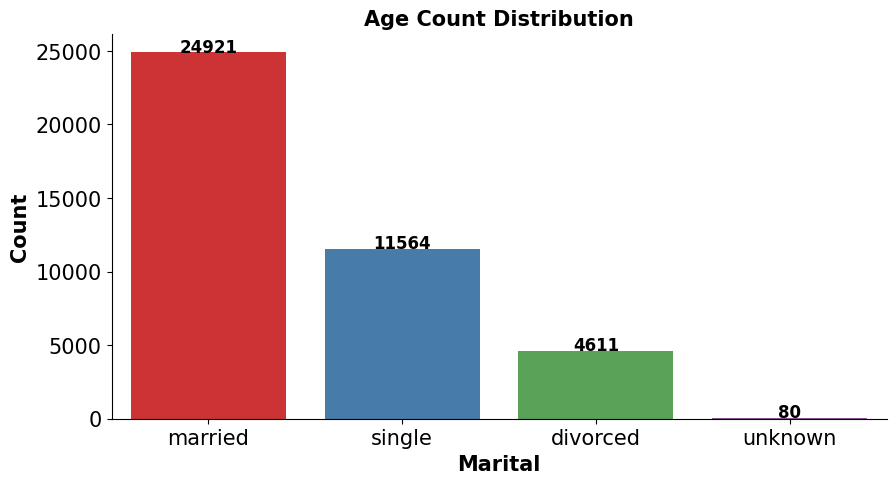

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank,palette='Set1')

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            '{:1.0f}'.format(height),
            ha="center", fontsize=12, fontweight='bold')
    
ax.set_xlabel('Marital', fontsize=15, fontweight='bold')
ax.set_ylabel('Count', fontsize=15, fontweight='bold')
ax.set_title('Age Count Distribution', fontsize=15, fontweight='bold')
ax.tick_params(labelsize=15)
sns.despine()

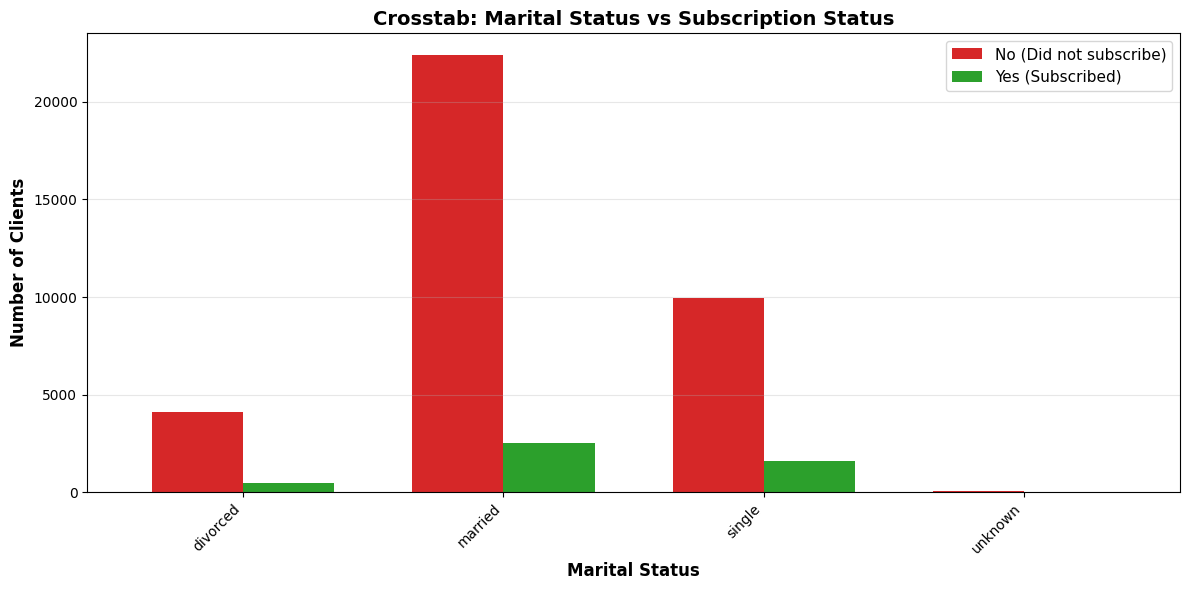

In [49]:
# Create crosstab
crosstab = pd.crosstab(bank['marital'], bank['y'])

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
crosstab.plot(kind='bar', ax=plt.gca(), color=[
              '#d62728', '#2ca02c'], width=0.7)

plt.title('Crosstab: Marital Status vs Subscription Status',
          fontsize=14, fontweight='bold')
plt.xlabel('Marital Status', fontsize=12, fontweight='bold')
plt.ylabel('Number of Clients', fontsize=12, fontweight='bold')

plt.legend(['No (Did not subscribe)', 'Yes (Subscribed)'],
           loc='upper right', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Single people are more likely to subscribe to term deposits (11.97%), while married people are less likely (7.39%). Divorced people fall in between (8.26%), and people with unknown marital status have the lowest rate (6.63%). This shows that marital status affects subscription decisions, with single people being the best targets for the bank.


#### 1.4 EDUCATION

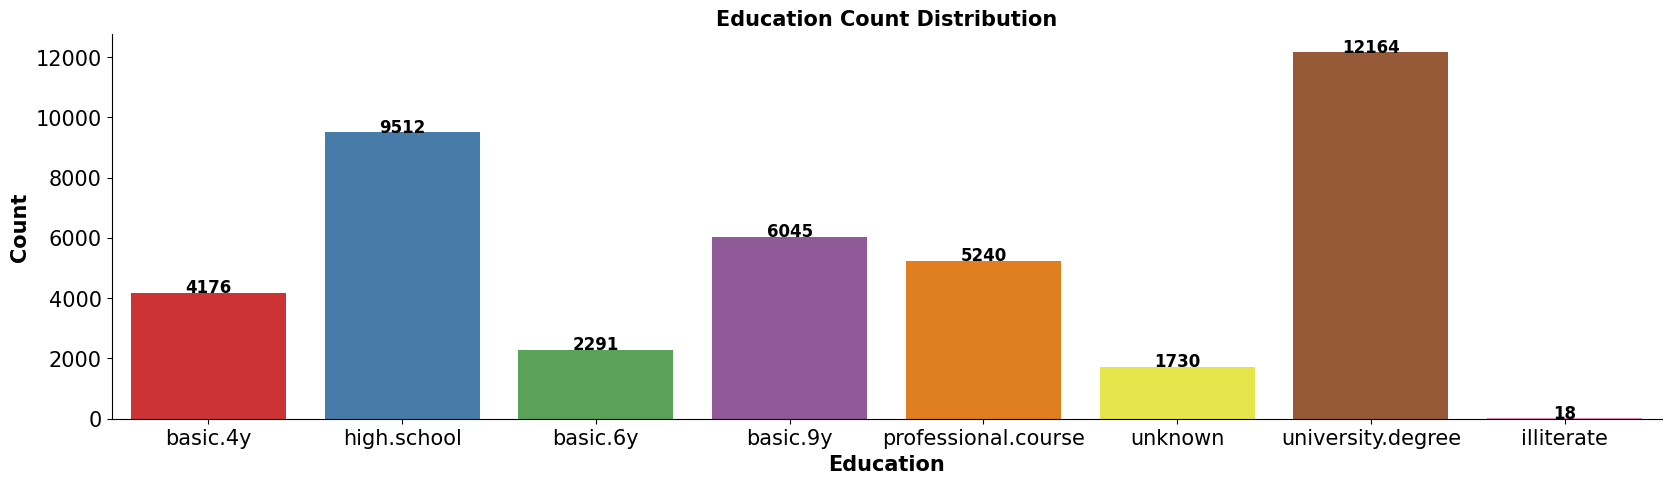

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank,palette='Set1')

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            '{:1.0f}'.format(height),
            ha="center", fontsize=12, fontweight='bold')
    
ax.set_xlabel('Education', fontsize=15, fontweight='bold')
ax.set_ylabel('Count', fontsize=15, fontweight='bold')
ax.set_title('Education Count Distribution', fontsize=15, fontweight='bold')
ax.tick_params(labelsize=15)
sns.despine()

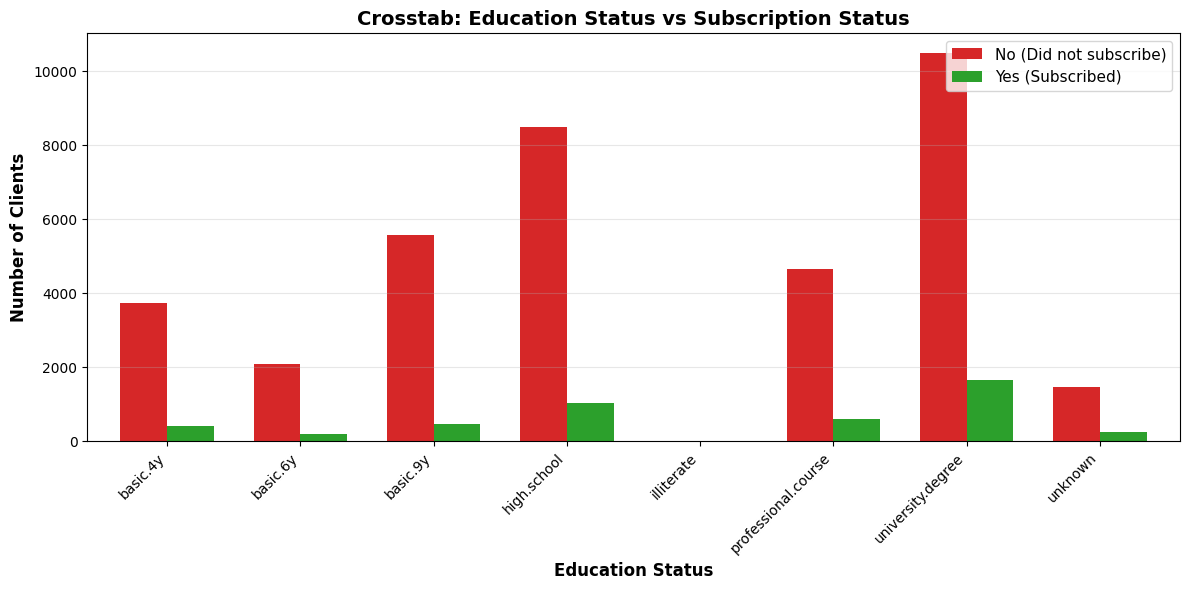

In [52]:
# Create crosstab
crosstab = pd.crosstab(bank['education'], bank['y'])

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
crosstab.plot(kind='bar', ax=plt.gca(), color=[
              '#d62728', '#2ca02c'], width=0.7)

plt.title('Crosstab: Education Status vs Subscription Status',
          fontsize=14, fontweight='bold')
plt.xlabel('Education Status', fontsize=12, fontweight='bold')
plt.ylabel('Number of Clients', fontsize=12, fontweight='bold')

plt.legend(['No (Did not subscribe)', 'Yes (Subscribed)'],
           loc='upper right', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

People with higher education are more likely to subscribe to term deposits. Those with tertiary education have the highest subscription rate (11.97%), while those with primary education have the lowest (5.02%). Secondary education falls in between (7.16%). This shows education level directly influences subscription decisions, with more educated people being better targets for the bank.

DEFAULT, HOUSING, LOAN

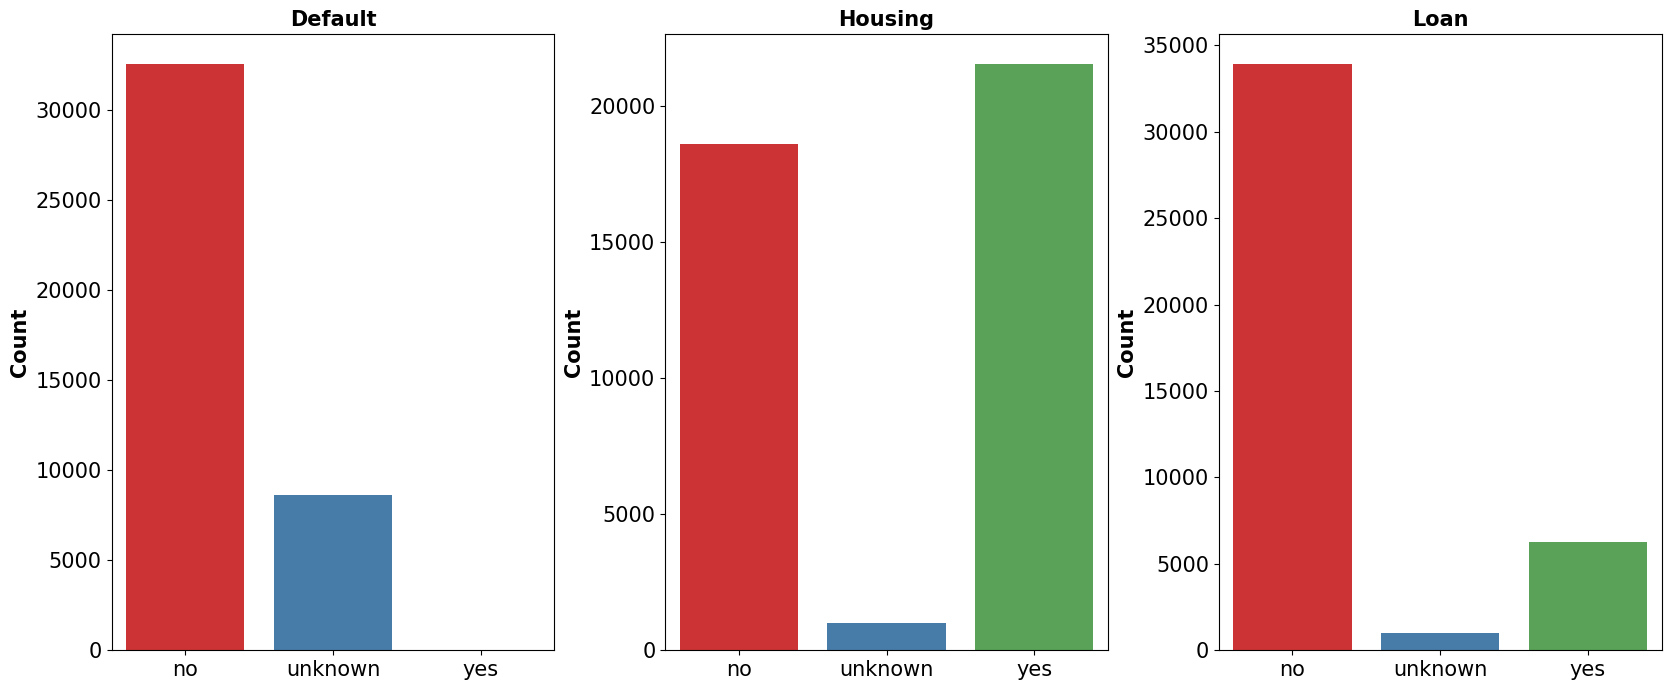

In [53]:
# Default:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
sns.countplot(x='default', data=bank, ax=ax1, order=['no','unknown','yes'],palette='Set1')
ax1.set_title('Default',fontsize=15,fontweight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('Count',fontsize=15,fontweight='bold')
ax1.tick_params(labelsize=15)

# Housing:
sns.countplot(x='housing', data=bank, ax=ax2, order=['no','unknown','yes'],palette='Set1')
ax2.set_title('Housing',fontsize=15,fontweight='bold')
ax2.set_xlabel('')
ax2.set_ylabel('Count',fontsize=15,fontweight='bold')
ax2.tick_params(labelsize=15)

# Loan:
sns.countplot(x='loan', data=bank, ax=ax3, order=['no','unknown','yes'],palette='Set1')
ax3.set_title('Loan',fontsize=15,fontweight='bold')
ax3.set_xlabel('')
ax3.set_ylabel('Count',fontsize=15, fontweight='bold')
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

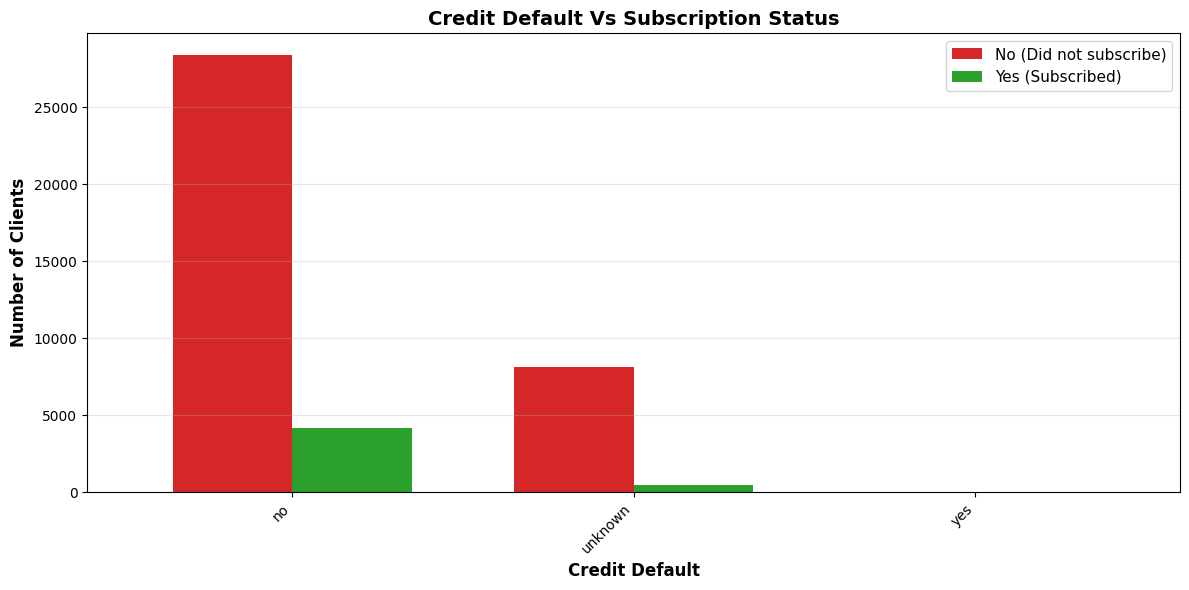

In [54]:
# Create crosstab
crosstab = pd.crosstab(bank['default'], bank['y'])

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
crosstab.plot(kind='bar', ax=plt.gca(), color=[
              '#d62728', '#2ca02c'], width=0.7)

plt.title('Credit Default Vs Subscription Status',
          fontsize=14, fontweight='bold')
plt.xlabel('Credit Default', fontsize=12, fontweight='bold')
plt.ylabel('Number of Clients', fontsize=12, fontweight='bold')

plt.legend(['No (Did not subscribe)', 'Yes (Subscribed)'],
           loc='upper right', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

People with a credit default are much less likely to subscribe to term deposits (3.66%), compared to those with no default history (9.41%). This shows a major difference in subscription behavior based on credit history. Customers without default are more trustworthy and reliable, making them better targets for bank's term deposit offers.

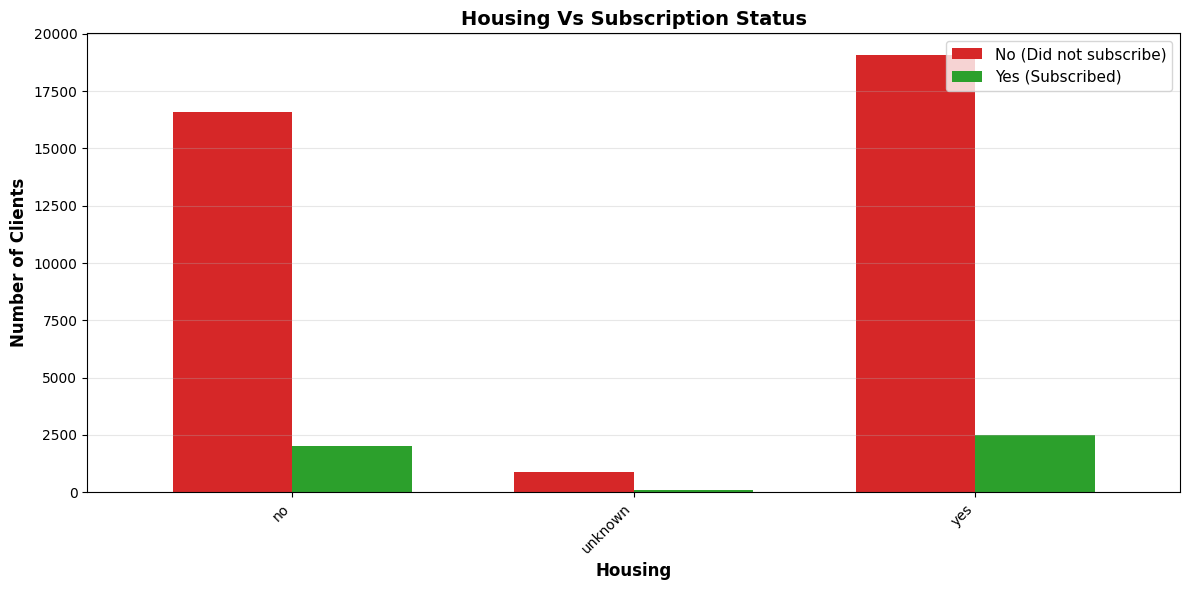

In [55]:
# Create crosstab
crosstab = pd.crosstab(bank['housing'], bank['y'])

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
crosstab.plot(kind='bar', ax=plt.gca(), color=[
              '#d62728', '#2ca02c'], width=0.7)

plt.title('Housing Vs Subscription Status',
          fontsize=14, fontweight='bold')
plt.xlabel('Housing', fontsize=12, fontweight='bold')
plt.ylabel('Number of Clients', fontsize=12, fontweight='bold')

plt.legend(['No (Did not subscribe)', 'Yes (Subscribed)'],
           loc='upper right', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

People without a housing loan are more likely to subscribe to term deposits (10.85%), compared to those with a housing loan (7.73%). This shows customers with existing housing loans have less money available for term deposits. Those without housing loans have more disposable income, making them better candidates for the bank's term deposit products.

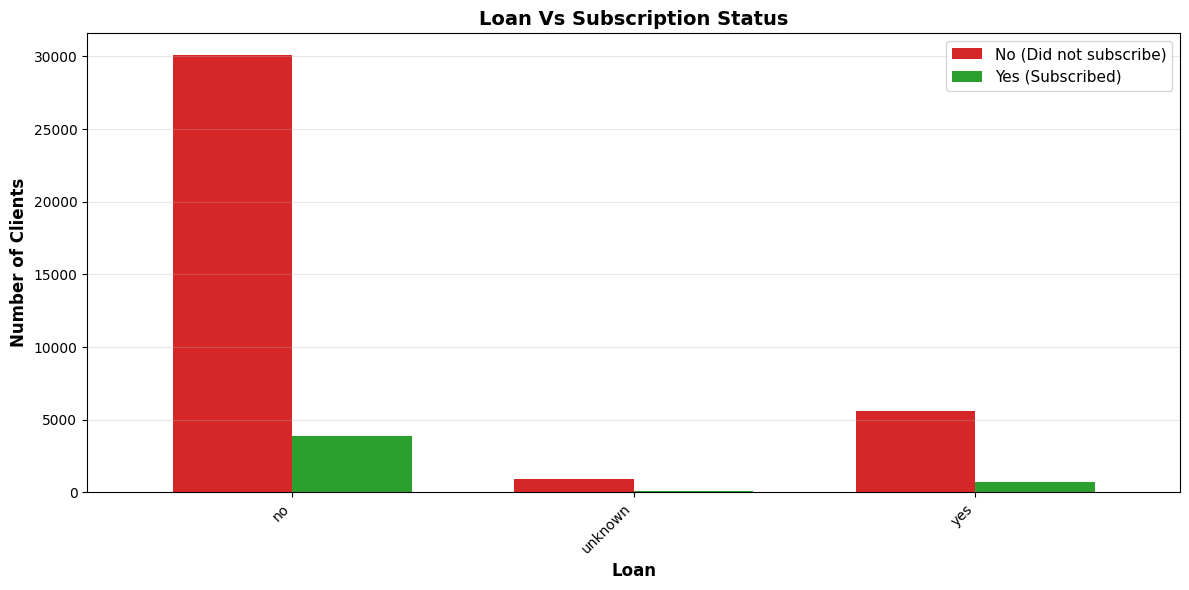

In [56]:
# Create crosstab
crosstab = pd.crosstab(bank['loan'], bank['y'])

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
crosstab.plot(kind='bar', ax=plt.gca(), color=[
              '#d62728', '#2ca02c'], width=0.7)

plt.title('Loan Vs Subscription Status',
          fontsize=14, fontweight='bold')
plt.xlabel('Loan', fontsize=12, fontweight='bold')
plt.ylabel('Number of Clients', fontsize=12, fontweight='bold')

plt.legend(['No (Did not subscribe)', 'Yes (Subscribed)'],
           loc='upper right', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

People without a personal loan are more likely to subscribe to term deposits (9.33%), compared to those with a personal loan (6.34%). Customers with existing personal loans have limited funds available for new investments. Those without personal loans have better financial capacity to invest in term deposits, making them more attractive targets for the bank

Categorical Treatment:

In [57]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Create a single LabelEncoder instance
labelencoder = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    bank_client[column] = labelencoder.fit_transform(bank_client[column])


In [58]:
bank_client

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0
41184,46,1,1,5,0,0,0
41185,56,5,1,6,0,2,0
41186,44,9,1,5,0,0,0


In [59]:
bank_client.age.nunique()

78

In [60]:
#function to creat group of ages, this helps because we have 78 differente values here

def age_binning(dataframe):
    """Bin age using list comprehension"""
    dataframe['age'] = [
        1 if age <= 32 else
        2 if age <= 47 else
        3 if age <= 70 else
        4 for age in dataframe['age']
    ]
    return dataframe

age_binning(bank_client);

In [61]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [62]:
bank_client.shape

(41176, 7)

### 2. Related with last contact of the current campaign

In [63]:
bank_related

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307
...,...,...,...,...
41183,cellular,nov,fri,334
41184,cellular,nov,fri,383
41185,cellular,nov,fri,189
41186,cellular,nov,fri,442
